# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

# Define o caminho para o arquivo de treino
TRAIN_CSV_PATH = 'dataset/train.csv'

# Carrega o arquivo para um DataFrame do pandas
try:
    df_train = pd.read_csv(TRAIN_CSV_PATH)
    print("Arquivo train.csv carregado com sucesso!")

    # Exibe as 5 primeiras linhas para uma inspeção visual
    print("\nPrimeiras 5 amostras do conjunto de treino:")
    display(df_train.head())

except FileNotFoundError:
    print(f"Erro: Arquivo {TRAIN_CSV_PATH} não encontrado. Verifique a estrutura das pastas.")

In [ ]:
# Exibe um resumo conciso do DataFrame
print("Informações gerais do DataFrame de treino:")
df_train.info()

In [ ]:
# Gera estatísticas descritivas para as colunas de texto
print("Resumo estatístico das colunas categóricas:")
display(df_train.describe(include='object'))

In [ ]:
# Pega o ID da primeira amostra
primeiro_id = df_train['Id'].iloc[0]
print(f"Verificando os arquivos para a primeira amostra: '{primeiro_id}'")

# Constrói o caminho para a pasta da amostra
caminho_amostra = os.path.join('dataset/wearables/', primeiro_id)

# Lista os arquivos dentro da pasta
try:
    arquivos_da_amostra = os.listdir(caminho_amostra)
    print(f"\nArquivos encontrados na pasta '{caminho_amostra}':")
    print(sorted(arquivos_da_amostra)) # sorted() para exibir em ordem alfabética
except FileNotFoundError:
    print(f"\nErro: A pasta '{caminho_amostra}' não foi encontrada. Verifique a estrutura de pastas.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_train foi carregado na seção anterior
# df_train = pd.read_csv('dataset/train.csv')

# Soma a quantidade de valores nulos por coluna
missing_labels = df_train.isnull().sum()

print("Contagem de valores ausentes por coluna em train.csv:")
print(missing_labels)

if missing_labels.sum() == 0:
    print("\nConclusão: Excelente! Não há valores ausentes no arquivo de rótulos (train.csv).")
else:
    print("\nAtenção: Foram encontrados valores ausentes no arquivo de rótulos.")

In [ ]:
import pandas as pd
import os
from tqdm import tqdm

# Lista de sensores a serem verificados
sensors_to_check = ['HR', 'EDA', 'TEMP', 'BVP', 'ACC', 'IBI']
# Dicionário para armazenar informações sobre dados ausentes
missing_data_report = {}

print("Iniciando verificação de valores ausentes nos arquivos de sensores...")

# Itera por cada amostra no nosso conjunto de treino
for user_id in tqdm(df_train['Id']):
    missing_files = []
    empty_files = []
    nan_in_files = {}

    # Itera por cada tipo de sensor para o usuário atual
    for sensor in sensors_to_check:
        file_path = os.path.join('dataset/wearables/', user_id, f'{sensor}.csv')

        # 1. Verifica se o arquivo existe
        if not os.path.exists(file_path):
            missing_files.append(sensor)
            continue

        # 2. Verifica se o arquivo está vazio
        if os.path.getsize(file_path) == 0:
            empty_files.append(sensor)
            continue

        # 3. Verifica se há valores NaN dentro do arquivo
        try:
            df_sensor = pd.read_csv(file_path, header=None)
            if df_sensor.isnull().sum().sum() > 0:
                nan_in_files[sensor] = df_sensor.isnull().sum().sum()
        except pd.errors.EmptyDataError:
            empty_files.append(sensor) # O arquivo pode ter um cabeçalho mas nenhum dado

    # Guarda o relatório para este usuário se algum problema foi encontrado
    if missing_files or empty_files or nan_in_files:
        missing_data_report[user_id] = {
            'Arquivos Ausentes': missing_files,
            'Arquivos Vazios': empty_files,
            'Valores NaN Internos': nan_in_files
        }

# --- Relatório Final ---
print("\nVerificação concluída.")
if not missing_data_report:
    print("\nConclusão: Ótima notícia! Nenhuma amostra de treino possui arquivos de sensores ausentes, vazios ou com valores NaN internos.")
else:
    print("\nAtenção: Foram encontrados problemas de dados ausentes em algumas amostras:")
    for user_id, report in missing_data_report.items():
        print(f"\nUsuário: {user_id}")
        if report['Arquivos Ausentes']: print(f"  - Arquivos Ausentes: {report['Arquivos Ausentes']}")
        if report['Arquivos Vazios']: print(f"  - Arquivos Vazios: {report['Arquivos Vazios']}")
        if report['Valores NaN Internos']: print(f"  - Valores NaN Internos: {report['Valores NaN Internos']}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- 1. CONFIGURAÇÃO E SELEÇÃO ALEATÓRIA DE USUÁRIOS ---

# Carrega o arquivo de treino para saber quais usuários pertencem a cada classe
df_labels = pd.read_csv('dataset/train.csv')

# Define os sensores que você quer visualizar na grade
sensors_to_plot = ['HR', 'EDA', 'TEMP', 'BVP', 'ACC', 'IBI']

# Dicionário para armazenar os IDs selecionados aleatoriamente
class_examples = {}
class_names = df_labels['Label'].unique() # Pega as classes diretamente do arquivo

# Itera por cada classe para sortear um usuário
for class_name in class_names:
    # Filtra todos os IDs pertencentes à classe atual
    ids_for_class = df_labels[df_labels['Label'] == class_name]['Id']
    # Sorteia um ID da lista
    random_id = ids_for_class.sample(n=1).iloc[0]
    # Adiciona o ID sorteado ao dicionário
    class_examples[class_name] = random_id

print(f"Usuários selecionados aleatoriamente para esta visualização: {class_examples}")

# --- 2. CRIAÇÃO DA GRADE DE GRÁFICOS ---

# Cria uma figura e uma grade de subplots.
# A altura da figura agora se ajusta automaticamente ao número de sensores
fig, axes = plt.subplots(nrows=len(sensors_to_plot), ncols=len(class_names),
                         figsize=(20, 5 * len(sensors_to_plot)),
                         sharey='row')

print("\nGerando grade de visualização dos sinais (com escalas e usuários aleatórios)...")

# Itera por cada SENSOR (que será uma LINHA no grid)
for row_idx, sensor in enumerate(sensors_to_plot):
    # Itera por cada CLASSE (que será uma COLUNA no grid)
    for col_idx, class_name in enumerate(class_names):

        ax = axes[row_idx, col_idx]
        user_id = class_examples[class_name]
        file_path = f'dataset/wearables/{user_id}/{sensor}.csv'

        try:
            # Lógica de leitura e plotagem específica para cada sensor
            if sensor == 'ACC':
                df_signal = pd.read_csv(file_path, header=None, skiprows=1, names=['X', 'Y', 'Z'])
                ax.plot(df_signal.index, df_signal['X'], label='Eixo X', linewidth=1)
                ax.plot(df_signal.index, df_signal['Y'], label='Eixo Y', linewidth=1)
                ax.plot(df_signal.index, df_signal['Z'], label='Eixo Z', linewidth=1)
                ax.legend(fontsize='small')

            elif sensor == 'IBI':
                df_signal = pd.read_csv(file_path, header=None, names=['Timestamp', 'Interval'])
                df_signal['Interval'] = pd.to_numeric(df_signal['Interval'], errors='coerce').dropna()
                ax.plot(df_signal.index, df_signal['Interval'])

            else: # HR, EDA, TEMP, BVP
                df_signal = pd.read_csv(file_path, header=None, skiprows=1)
                ax.plot(df_signal.index, df_signal.values)

        except (FileNotFoundError, pd.errors.EmptyDataError):
            ax.text(0.5, 0.5, 'Dados não encontrados', ha='center', va='center')

        # --- Formatação dos Gráficos ---
        ax.grid(True, linestyle='--', alpha=0.6)

        if row_idx == 0:
            ax.set_title(class_name, fontsize=16, weight='bold')

        if col_idx == 0:
            ax.set_ylabel(sensor, fontsize=14, weight='bold')

        if row_idx == len(sensors_to_plot) - 1:
            ax.set_xlabel('Amostras (Tempo)')

# --- 3. FINALIZAÇÃO E EXIBIÇÃO ---
plt.suptitle('Comparação Visual dos Sinais dos Sensores por Classe (Amostras Aleatórias)', fontsize=24, y=1.0)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Bibliotecas do tsfresh
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters# O menu rápido!

# --- 1. CARREGAMENTO E PREPARAÇÃO DOS DADOS PARA O TSFRESH ---
BASE_PATH = 'dataset/wearables/'
TRAIN_CSV_PATH = 'dataset/train.csv'
df_labels = pd.read_csv(TRAIN_CSV_PATH)

all_sensor_data = []
print("Preparando dados brutos para o formato do tsfresh...")
for index, row in tqdm(df_labels.iterrows(), total=len(df_labels)):
    user_id = row['Id']
    for sensor in ['HR', 'EDA', 'TEMP', 'BVP', 'ACC', 'IBI']:
        file_path = os.path.join(BASE_PATH, user_id, f'{sensor}.csv')
        try:
            if sensor == 'ACC':
                df_sensor = pd.read_csv(file_path, header=None, skiprows=1, names=['X', 'Y', 'Z'])
                for axis in ['X', 'Y', 'Z']:
                    df_axis = df_sensor[[axis]].copy(); df_axis.columns = ['value']; df_axis['kind'] = f'ACC_{axis}'; df_axis['Id'] = user_id; df_axis['time'] = range(len(df_axis)); all_sensor_data.append(df_axis[['Id', 'time', 'kind', 'value']])
            elif sensor == 'IBI':
                df_sensor = pd.read_csv(file_path, header=None, names=['Timestamp', 'Interval']); df_sensor['Interval'] = pd.to_numeric(df_sensor['Interval'], errors='coerce'); df_sensor.dropna(subset=['Interval'], inplace=True); df_sensor = df_sensor[['Interval']].copy(); df_sensor.columns = ['value']; df_sensor['kind'] = 'IBI'; df_sensor['Id'] = user_id; df_sensor['time'] = range(len(df_sensor)); all_sensor_data.append(df_sensor[['Id', 'time', 'kind', 'value']])
            else:
                df_sensor = pd.read_csv(file_path, header=None, skiprows=1, names=['value']); df_sensor['kind'] = sensor; df_sensor['Id'] = user_id; df_sensor['time'] = range(len(df_sensor)); all_sensor_data.append(df_sensor[['Id', 'time', 'kind', 'value']])
        except (FileNotFoundError, pd.errors.EmptyDataError):
            continue
df_long_format = pd.concat(all_sensor_data)
print("Formato de dados para tsfresh criado.")

# --- 2. EXTRAÇÃO E SELEÇÃO DE FEATURES COM TSFRESH ---
print("\nIniciando extração EFICIENTE de features com tsfresh (rápido)...")
extracted_features = extract_features(df_long_format,
                                      column_id='Id',
                                      column_sort='time',
                                      column_kind='kind',
                                      column_value='value',
                                      default_fc_parameters=EfficientFCParameters(),
                                      n_jobs=6) # n_jobs=1 para evitar erros de paralelismo

print("Extração concluída. Limpando e selecionando as melhores features...")
impute(extracted_features)
y_for_selection = df_labels.set_index('Id')['Label']
extracted_features = extracted_features.loc[y_for_selection.index]
df_final_tsfresh = select_features(extracted_features, y_for_selection)
print(f"\nSeleção concluída. De {extracted_features.shape[1]} features eficientes, {df_final_tsfresh.shape[1]} foram selecionadas como relevantes.")


# --- 3. GERAÇÃO DO HEATMAP MELHORADO ---

print("\nGerando a matriz de correlação com as características do tsfresh...")
# O tsfresh pode gerar muitas features, então vamos pegar apenas as 15 mais importantes para o heatmap, para ficar legível
# Se quiser ver todas, remova o .head(15)
top_features = df_final_tsfresh.iloc[:, :15]
correlation_matrix = top_features.corr()

plt.figure(figsize=(16, 12))
# --- MUDANÇAS NO HEATMAP ---
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',          # Esquema de cores: Blue -> White -> Red
    annot=True,          # Mostra os valores numéricos
    fmt='.2f',           # Formata os números para 2 casas decimais
    linewidths=.5,       # Adiciona linhas finas entre as células
    vmin=-1, vmax=1      # Fixa a escala de cores de -1 a 1
)
plt.title('Matriz de Correlação das Características Mais Relevantes (tsfresh)', fontsize=20)
plt.xticks(rotation=45, ha='right') # Rotaciona os labels do eixo X para não sobrepor
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_final_tsfresh' e 'df_labels' já existem da célula anterior

# Adiciona a coluna 'Label' ao nosso dataframe de características para a plotagem
df_analysis = df_final_tsfresh.copy()
df_analysis['Label'] = df_labels.set_index('Id')['Label']

print("DataFrame para análise está pronto.")
print(f"Número de características selecionadas pelo tsfresh: {len(df_analysis.columns) - 1}")
print("Exemplo de algumas características:")
display(df_analysis.head())

DataFrame para análise está pronto.
Número de características selecionadas pelo tsfresh: 1228
Exemplo de algumas características:


ACC_Z__number_peaks__n_5  ACC_Y__number_peaks__n_3  \
Id                                                            
U_79201                    1364.0                    1372.0   
U_56491                    3448.0                    4321.0   
U_94628                    3247.0                    3109.0   
U_97819                    4100.0                    4131.0   
U_96956                    2233.0                    2673.0   

         ACC_Y__number_peaks__n_5  ACC_X__number_peaks__n_3  \
Id                                                            
U_79201                     874.0                    2142.0   
U_56491                    3093.0                    5698.0   
U_94628                    2086.0                    4998.0   
U_97819                    2741.0                    6359.0   
U_96956                    1776.0                    3713.0   

         ACC_Z__number_peaks__n_3  ACC_X__number_peaks__n_5  \
Id                                                            
U_79201                    2118.0                    1323.0   
U_56491                    5242.0                    3779.0   
U_94628                    4905.0                    3044.0   
U_97819                    5613.0                    4281.0   
U_96956                    3490.0                    2374.0   

         ACC_Y__number_peaks__n_10  ACC_Z__number_peaks__n_10  \
Id                                                              
U_79201                      471.0                      707.0   
U_56491                     1741.0                     1957.0   
U_94628                     1208.0                     1771.0   
U_97819                     1675.0                     2192.0   
U_96956                     1054.0                     1247.0   

         ACC_X__number_peaks__n_10  ACC_Y__number_peaks__n_1  ...  \
Id                                                            ...   
U_79201                      658.0                    2741.0  ...   
U_56491                     2010.0                    8987.0  ...   
U_94628                     1619.0                    7776.0  ...   
U_97819                     2256.0                   12715.0  ...   
U_96956                     1328.0                    6994.0  ...   

         EDA__fft_aggregated__aggtype_"variance"  \
Id                                                 
U_79201                             7.404813e+05   
U_56491                             1.855365e+06   
U_94628                             1.235819e+06   
U_97819                             1.227447e+06   
U_96956                             3.792331e+06   

         EDA__lempel_ziv_complexity__bins_3  \
Id                                            
U_79201                            0.034345   
U_56491                            0.022686   
U_94628                            0.034479   
U_97819                            0.025012   
U_96956                            0.016705   

         HR__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2  \
Id                                                                        
U_79201                                           0.044878                
U_56491                                           0.257202                
U_94628                                           0.096509                
U_97819                                           0.052838                
U_96956                                           0.031313                

         IBI__fft_coefficient__attr_"abs"__coeff_92  \
Id                                                    
U_79201                                    2.007345   
U_56491                                    1.710678   
U_94628                                    4.262795   
U_97819                                    2.395981   
U_96956                                   10.431680   

         TEMP__linear_trend__attr_"stderr"  \
Id                                           
U_79201                       2.681833e-06  

In [58]:
from sklearn.feature_selection import f_classif

# Separa X e y para o teste estatístico
X_features = df_analysis.drop('Label', axis=1)
y_labels = df_analysis['Label']

# Calcula o F-value para cada característica. Quanto maior, mais diferente é a média entre as classes.
f_values, p_values = f_classif(X_features, y_labels)

# Cria um DataFrame para visualizar a importância
feature_importance = pd.DataFrame({'Feature': X_features.columns, 'F-value': f_values})
feature_importance = feature_importance.sort_values(by='F-value', ascending=False)

# Seleciona as 6 características com maior F-value para a visualização
top_features_to_plot = feature_importance['Feature'].head(100).tolist()

print("As 20 características mais promissoras para diferenciar as classes são:")
print(top_features_to_plot)

As 20 características mais promissoras para diferenciar as classes são:
['ACC_Y__permutation_entropy__dimension_3__tau_1', 'ACC_Y__permutation_entropy__dimension_4__tau_1', 'ACC_X__permutation_entropy__dimension_7__tau_1', 'ACC_Y__permutation_entropy__dimension_5__tau_1', 'ACC_X__permutation_entropy__dimension_6__tau_1', 'ACC_Y__permutation_entropy__dimension_7__tau_1', 'ACC_Y__permutation_entropy__dimension_6__tau_1', 'ACC_X__permutation_entropy__dimension_3__tau_1', 'ACC_X__permutation_entropy__dimension_5__tau_1', 'ACC_X__permutation_entropy__dimension_4__tau_1', 'ACC_X__lempel_ziv_complexity__bins_100', 'ACC_Y__root_mean_square', 'ACC_Y__lempel_ziv_complexity__bins_100', 'ACC_Y__benford_correlation', 'ACC_Y__mean_abs_change', 'ACC_Y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0', 'ACC_X__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0', 'ACC_X__mean_abs_change', 'ACC_X__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0', 'ACC_Y__change_quantiles__f

ValueError: num must be an integer with 1 <= num <= 20, not 21

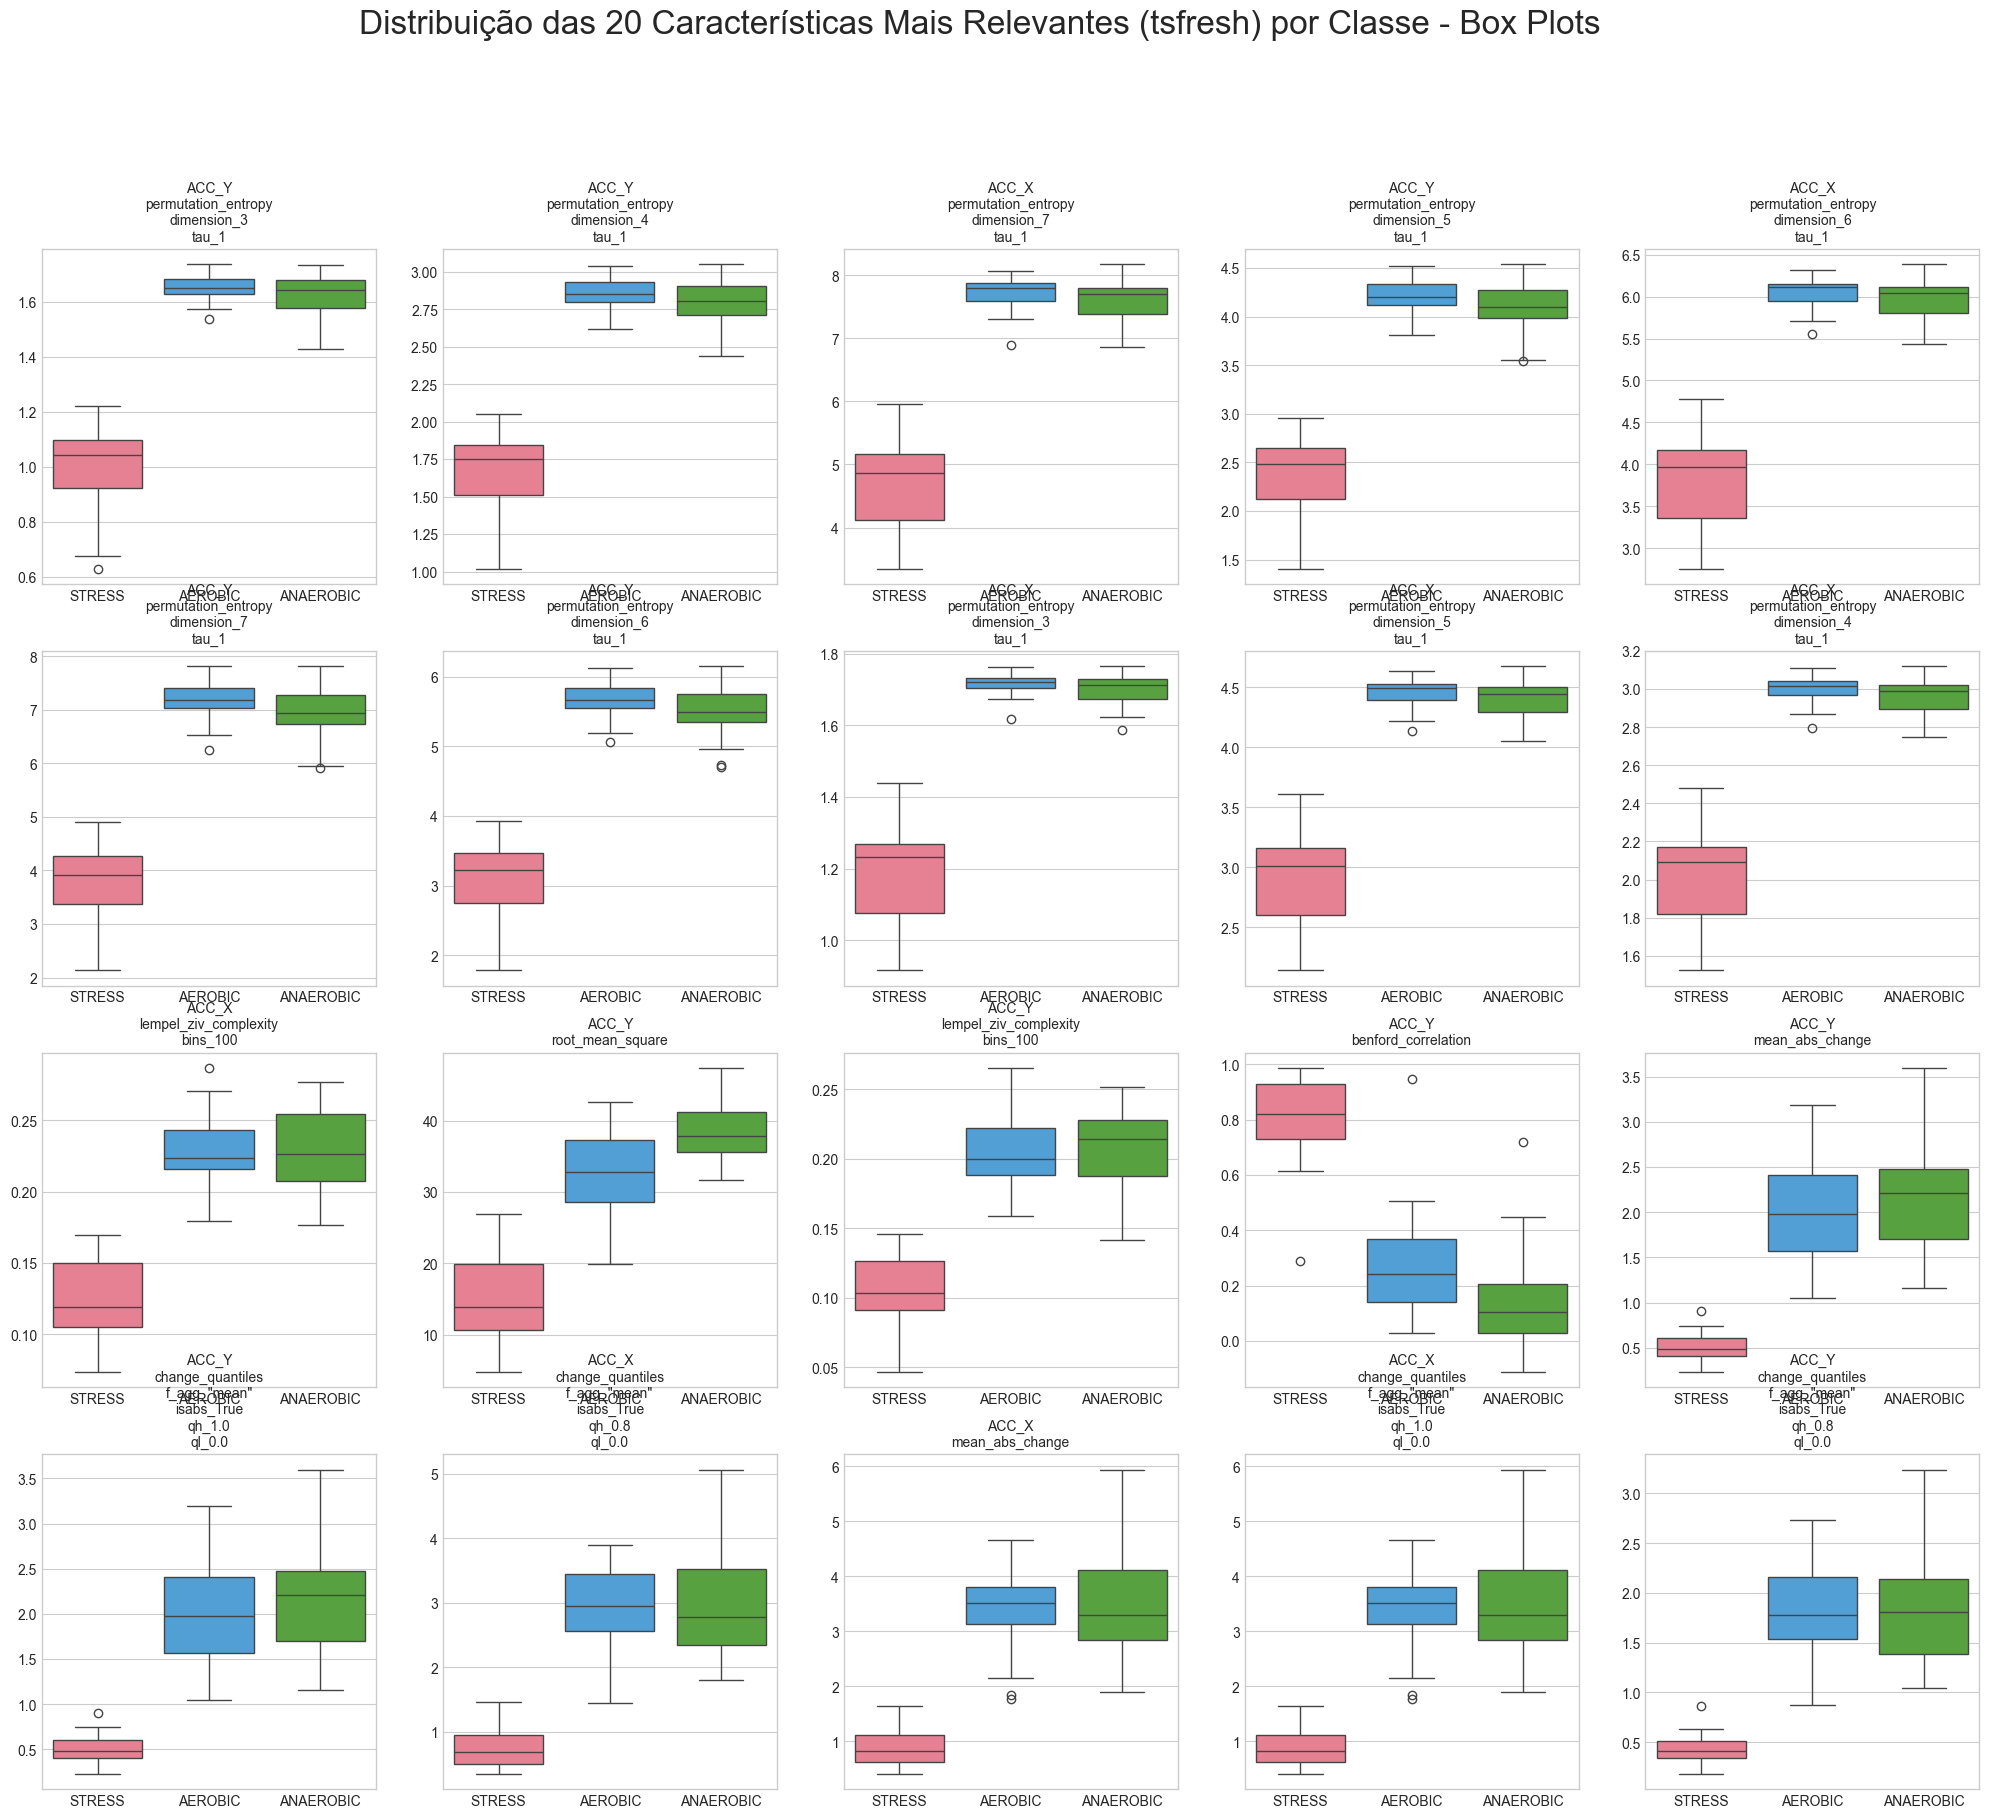

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 3.3.3 (Alternativa): Comparação com Box Plots ---

plt.figure(figsize=(25, 20))
plt.suptitle('Distribuição das 20 Características Mais Relevantes (tsfresh) por Classe - Box Plots', fontsize=24, y=1.0)

for i, feature in enumerate(top_features_to_plot):
    plt.subplot(4, 5, i + 1)

    # **------ MUDANÇA PRINCIPAL AQUI ------**
    # Trocamos violinplot por boxplot. A sintaxe é a mesma.
    sns.boxplot(
        x='Label',
        y=feature,
        data=df_analysis,
        palette='husl',
        order=['STRESS', 'AEROBIC', 'ANAEROBIC'],
        hue='Label',
        legend=False
    )
    # **-------------------------------------**

    title = feature.replace('__', '\n')
    plt.title(title, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

As 100 características mais promissoras para diferenciar as classes foram selecionadas.


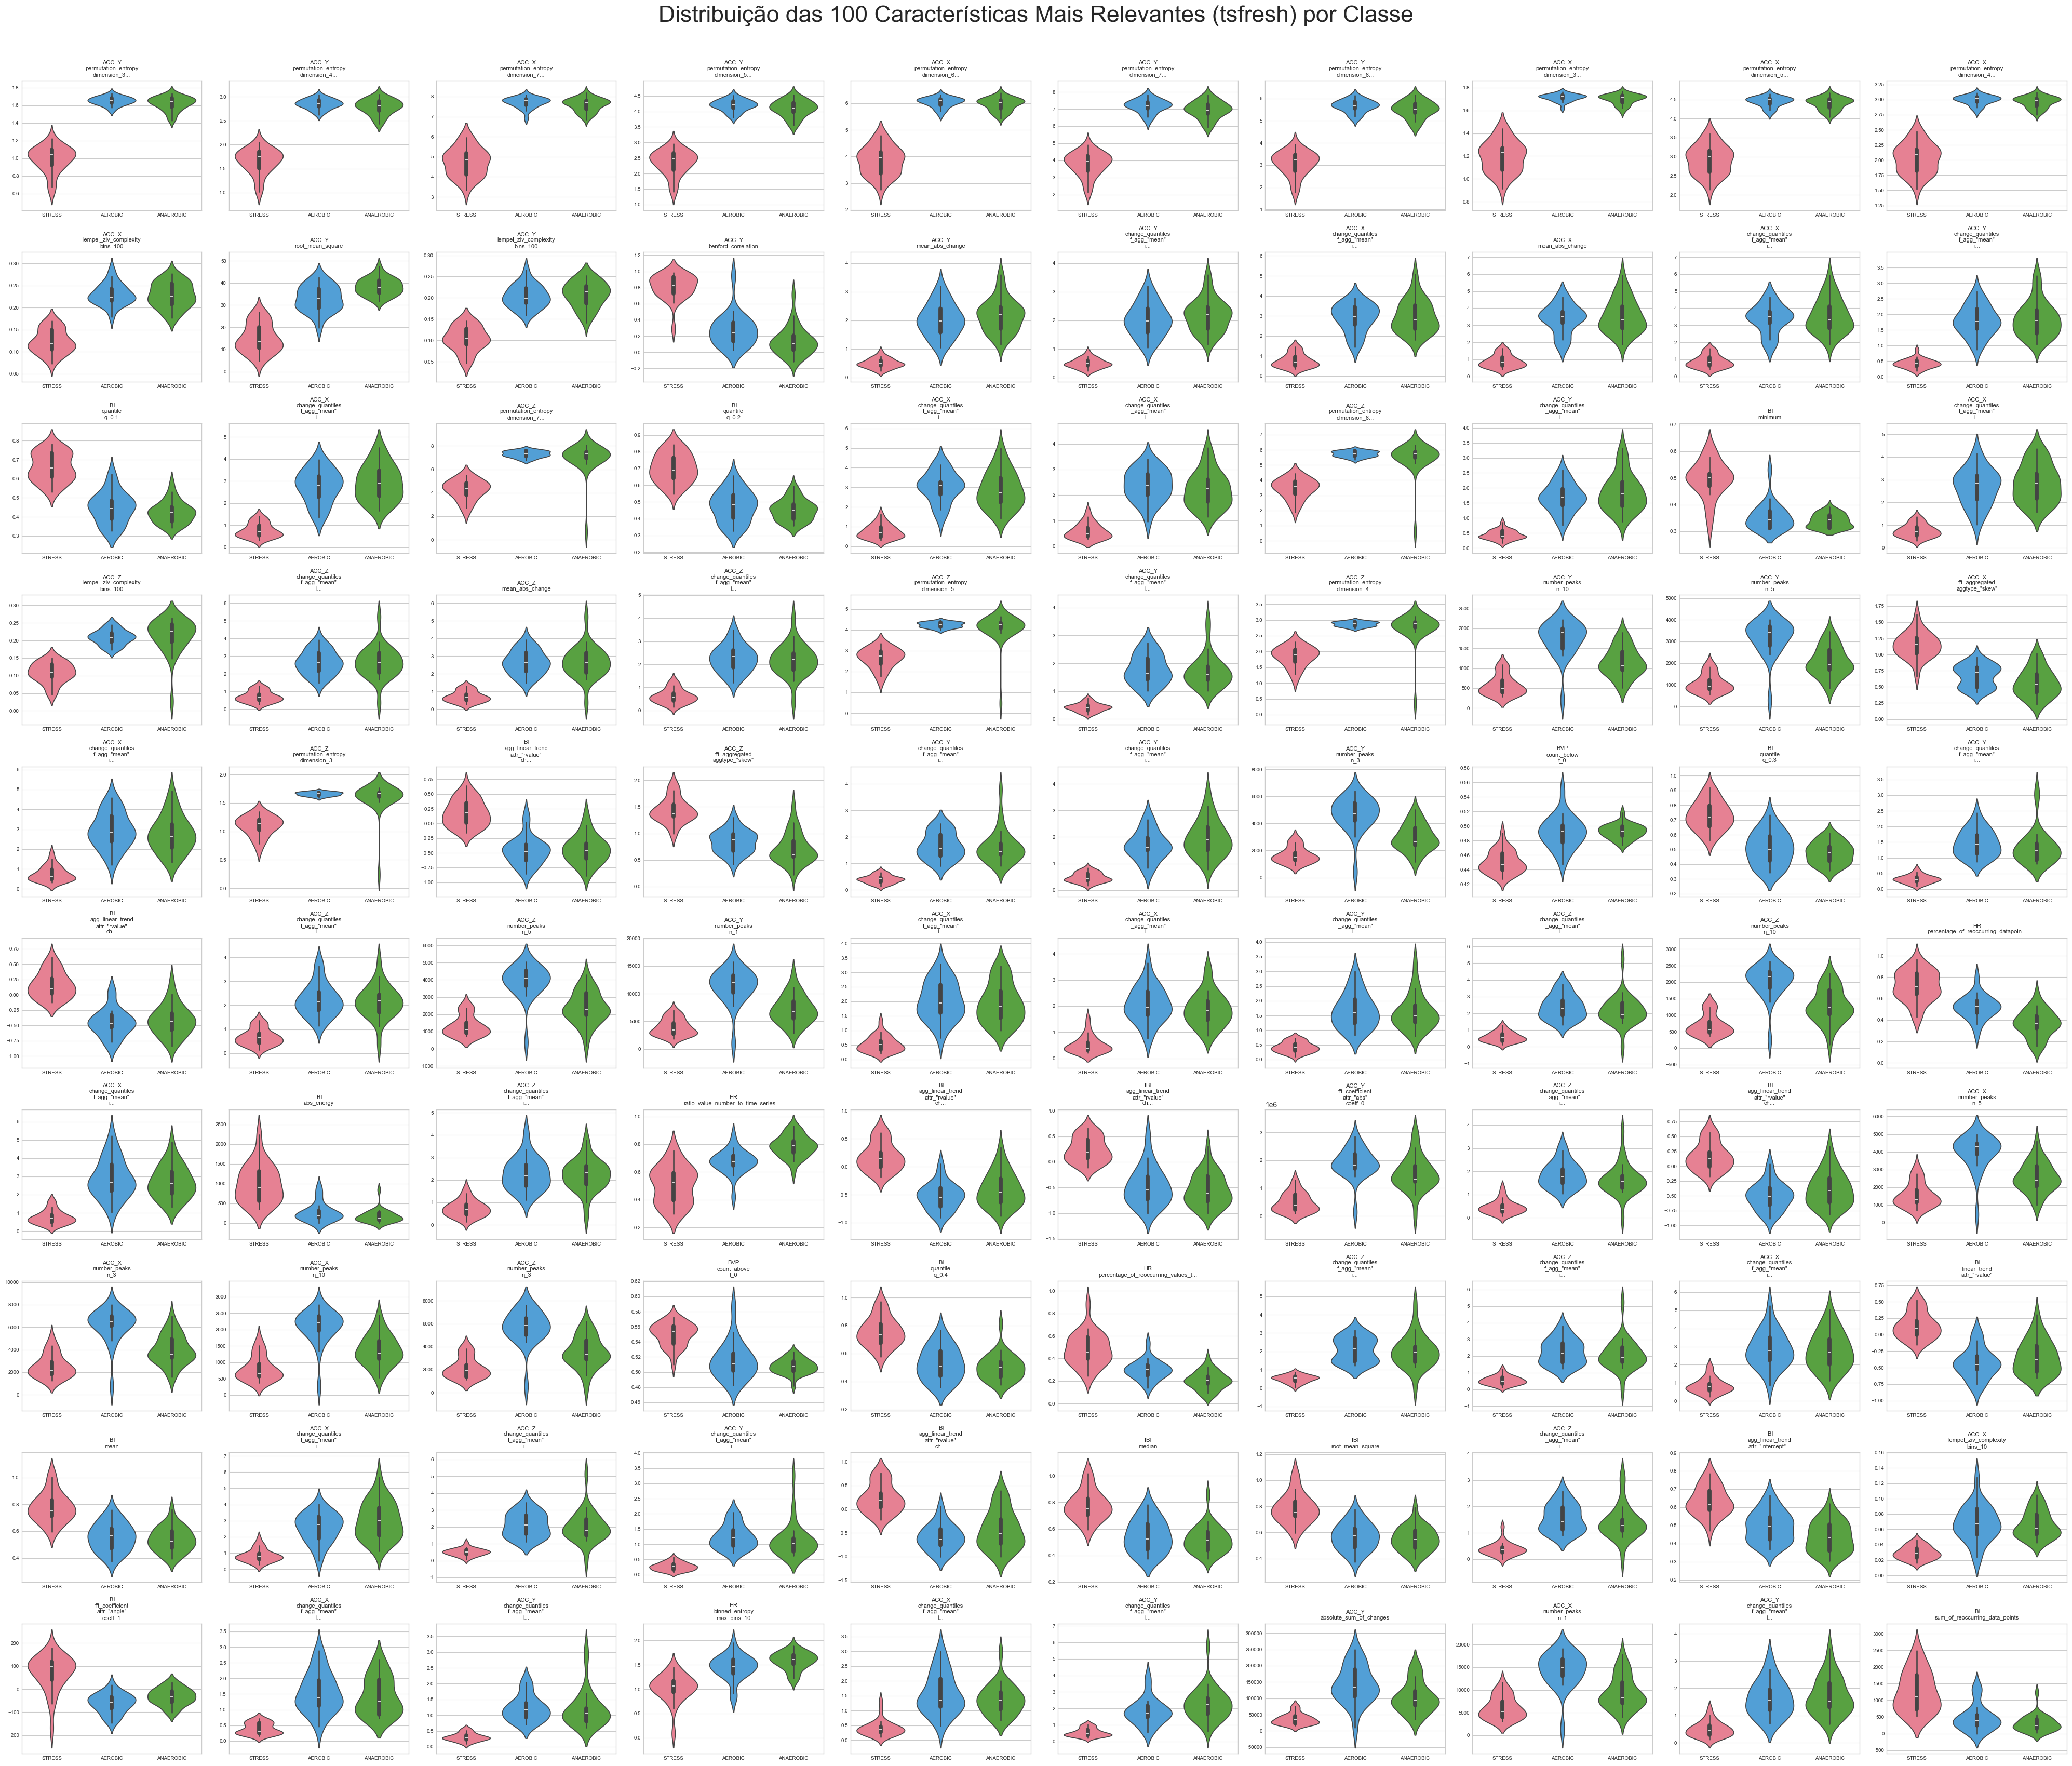

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

# --- 1. Identificando as 100 Características Mais Promissoras ---

# Este código assume que 'df_analysis' foi criado em uma célula anterior.

# Separa X e y para o teste estatístico
X_features = df_analysis.drop('Label', axis=1)
y_labels = df_analysis['Label']

# Calcula o F-value para cada característica
f_values, p_values = f_classif(X_features, y_labels)

# Cria um DataFrame para visualizar a importância
feature_importance = pd.DataFrame({'Feature': X_features.columns, 'F-value': f_values})
feature_importance = feature_importance.sort_values(by='F-value', ascending=False)

# **------ MUDANÇA 1: Selecionar as 100 melhores características ------**
# Garante que não tentaremos plotar mais features do que temos disponíveis
num_features_to_plot = min(100, len(X_features.columns))
top_features_to_plot = feature_importance['Feature'].head(num_features_to_plot).tolist()

print(f"As {num_features_to_plot} características mais promissoras para diferenciar as classes foram selecionadas.")


# --- 2. Comparação das Distribuições por Classe (Violin Plots) ---

# **------ MUDANÇA 2: Ajustar o tamanho da figura para a nova grade ------**
# Aumentamos muito o tamanho para acomodar uma grade 10x10
plt.figure(figsize=(40, 35))
plt.suptitle(f'Distribuição das {num_features_to_plot} Características Mais Relevantes (tsfresh) por Classe', fontsize=32, y=1.0)

# Itera pelas 100 melhores características para criar um subplot para cada uma
for i, feature in enumerate(top_features_to_plot):
    # **------ MUDANÇA 3: Ajustar a grade de subplots para 10x10 ------**
    plt.subplot(10, 10, i + 1)

    # Desenha o violin plot
    sns.violinplot(
        x='Label',
        y=feature,
        data=df_analysis,
        palette='husl',
        order=['STRESS', 'AEROBIC', 'ANAEROBIC'],
        hue='Label',
        legend=False
    )

    # Formata o título para ser mais curto e legível
    # Quebra em nova linha e limita o comprimento total
    title = feature.replace('__', '\n')
    if len(title) > 40: # Se o título for muito longo, encurta
        title = title[:37] + '...'
    plt.title(title, fontsize=8) # Reduzimos a fonte drasticamente

    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=7) # Reduz a fonte dos ticks do eixo X
    plt.yticks(fontsize=7) # Reduz a fonte dos ticks do eixo Y

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

Características selecionadas para o Pairplot: ['ACC_Y__permutation_entropy__dimension_3__tau_1', 'ACC_Y__permutation_entropy__dimension_4__tau_1', 'ACC_X__permutation_entropy__dimension_7__tau_1', 'ACC_Y__permutation_entropy__dimension_5__tau_1', 'ACC_X__permutation_entropy__dimension_6__tau_1', 'ACC_Y__permutation_entropy__dimension_7__tau_1', 'ACC_Y__permutation_entropy__dimension_6__tau_1', 'ACC_X__permutation_entropy__dimension_3__tau_1', 'ACC_X__permutation_entropy__dimension_5__tau_1', 'ACC_X__permutation_entropy__dimension_4__tau_1', 'ACC_X__lempel_ziv_complexity__bins_100', 'ACC_Y__root_mean_square', 'ACC_Y__lempel_ziv_complexity__bins_100', 'ACC_Y__benford_correlation', 'ACC_Y__mean_abs_change', 'ACC_Y__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0', 'ACC_X__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0', 'ACC_X__mean_abs_change', 'ACC_X__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0', 'ACC_Y__change_quantiles__f_agg_"mean"__isabs_True__q

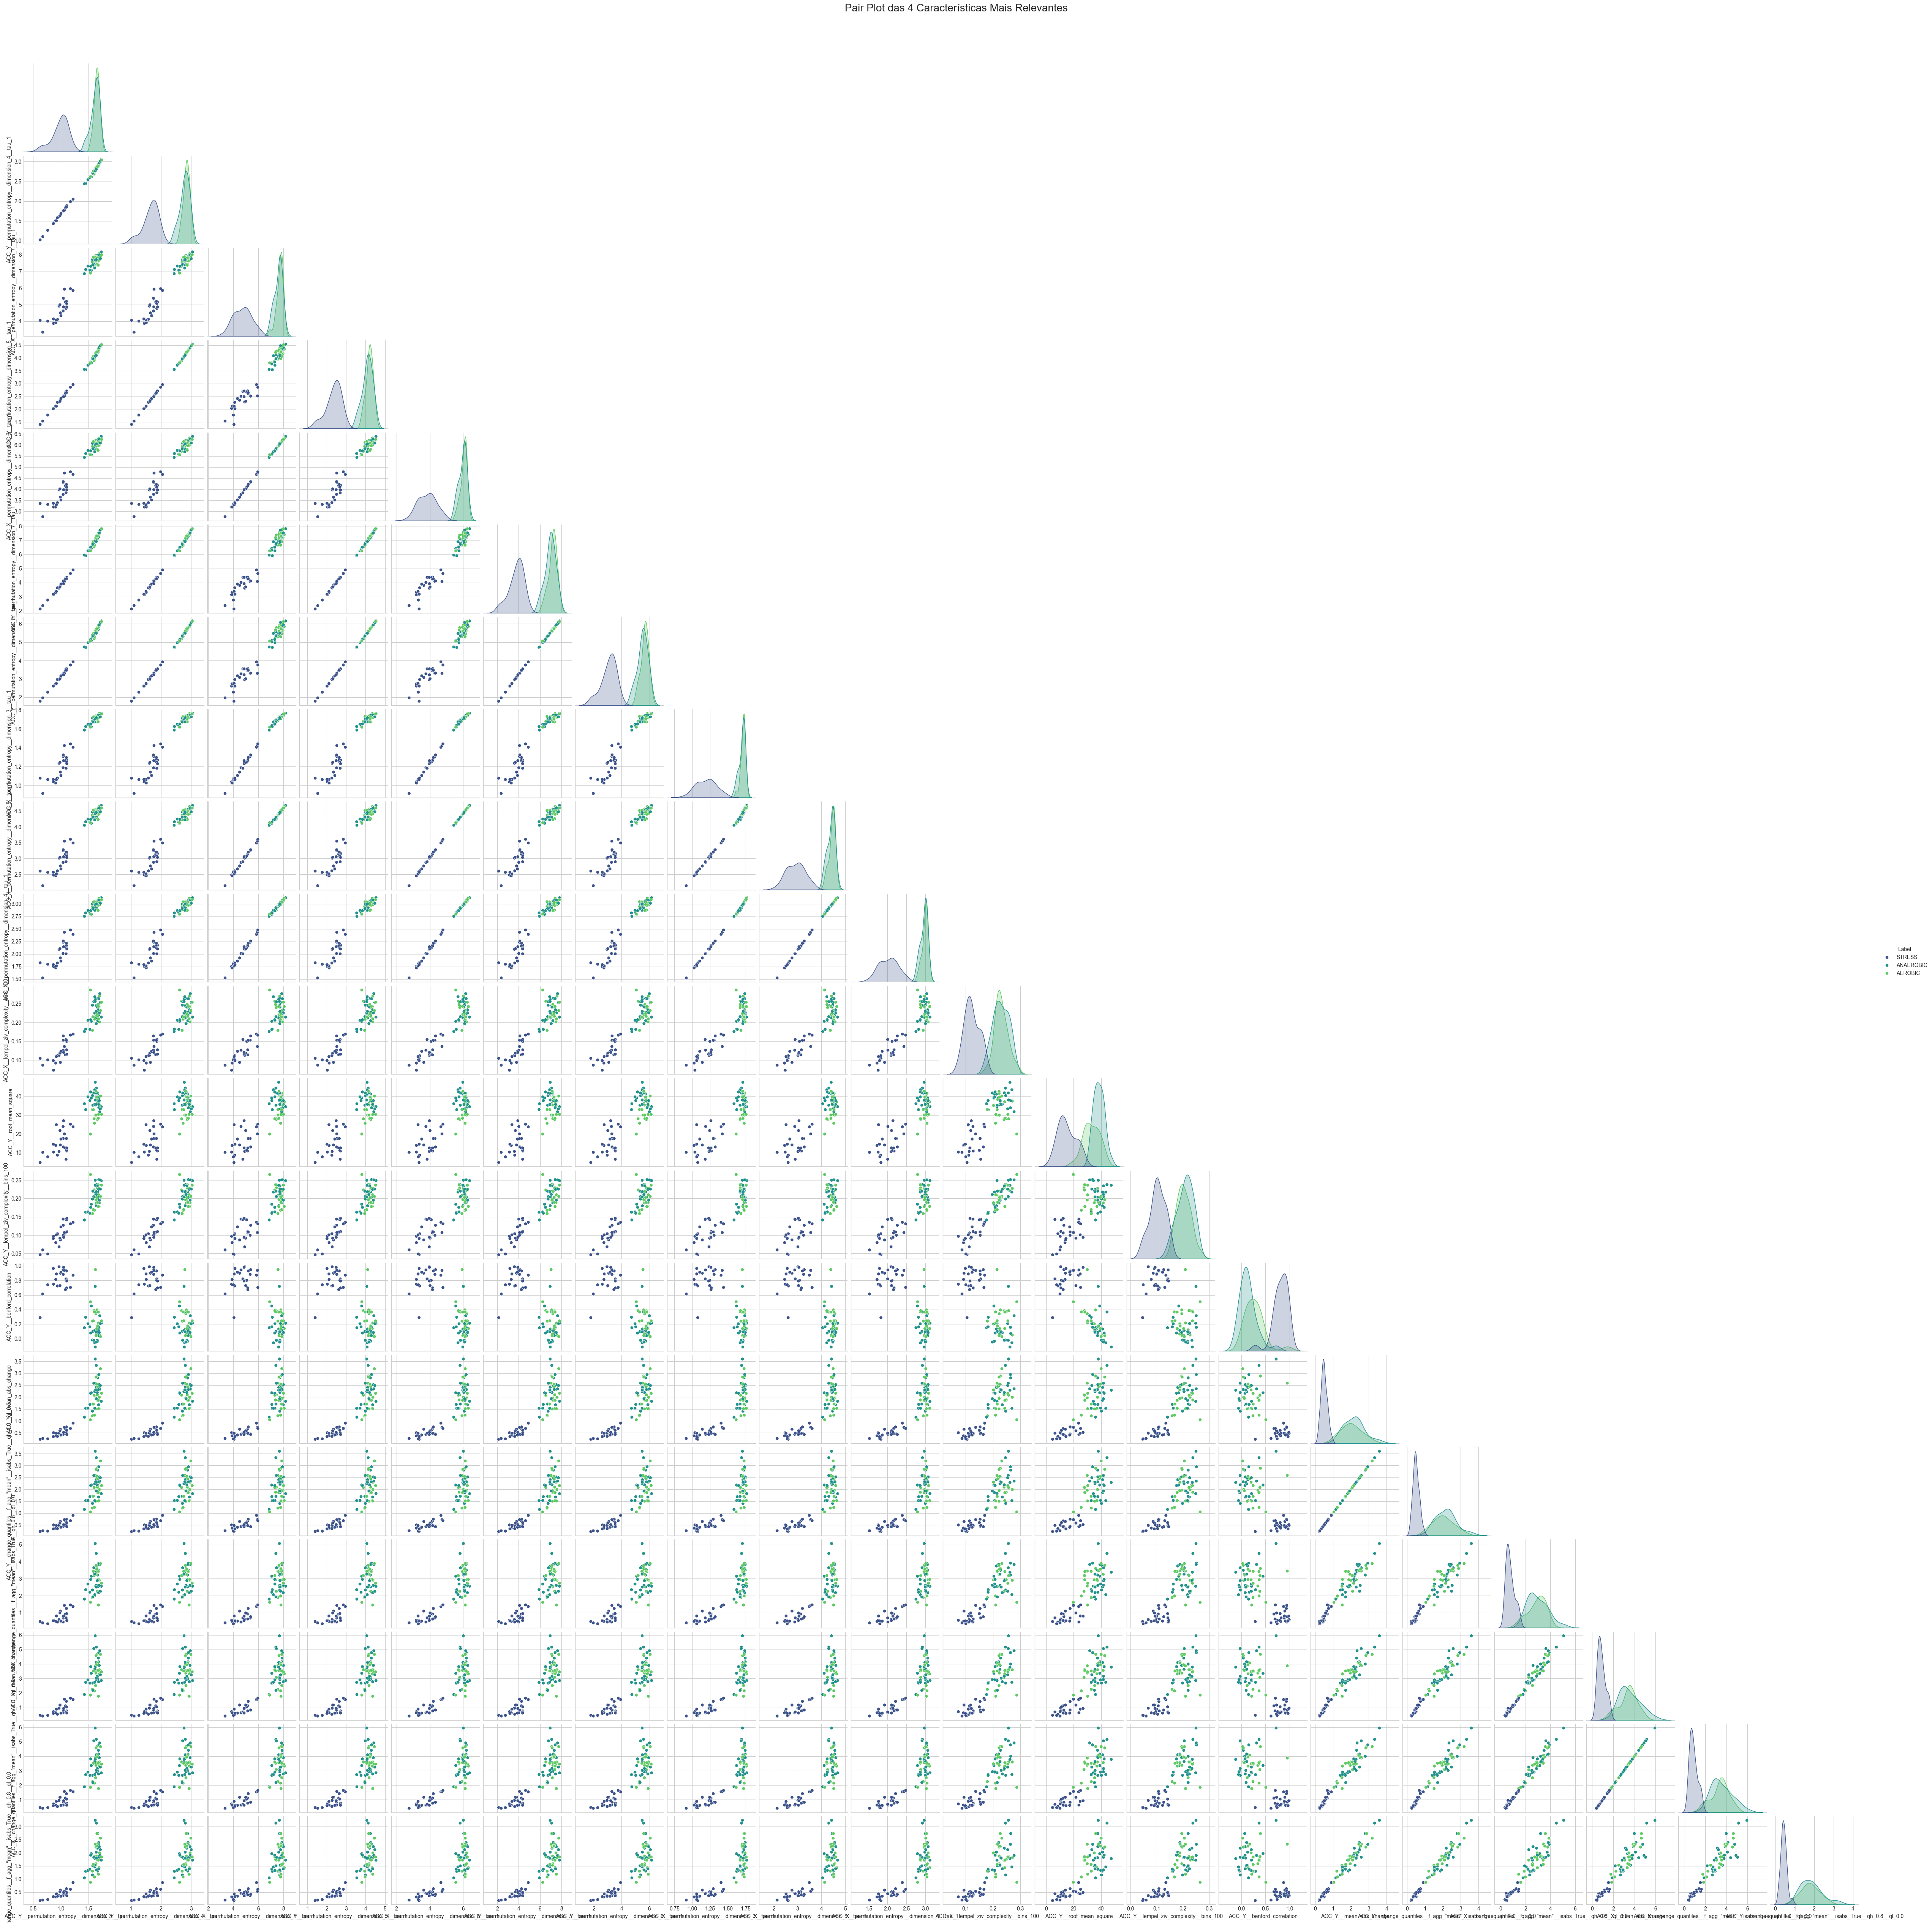

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# Garante que o df_analysis está pronto (executado em seções anteriores)
df_analysis = df_final_tsfresh.copy()
df_analysis['Label'] = df_labels.set_index('Id')['Label']
# --- Identificando as 4 Características Mais Promissoras para o Pairplot ---
# (Repetimos este passo para garantir que a variável 'top_features_to_plot' esteja definida)
X_features = df_analysis.drop('Label', axis=1)
y_labels = df_analysis['Label']
f_values, p_values = f_classif(X_features, y_labels)
feature_importance = pd.DataFrame({'Feature': X_features.columns, 'F-value': f_values})
feature_importance = feature_importance.sort_values(by='F-value', ascending=False)

# Escolhemos um número pequeno de features (4 ou 5) para que o pairplot seja legível
top_features_for_pairplot = feature_importance['Feature'].head(20).tolist()
print("Características selecionadas para o Pairplot:", top_features_for_pairplot)

# --- Gerando o Pairplot ---
print("\nGerando Pairplot... (Isso pode levar um minuto)")

# Adiciona a coluna 'Label' de volta para o 'hue'
df_pairplot = df_analysis[top_features_for_pairplot + ['Label']]

sns.pairplot(df_pairplot, hue='Label', palette='viridis', corner=True)
plt.suptitle('Pair Plot das 4 Características Mais Relevantes', size=20, y=1.02)
plt.show()

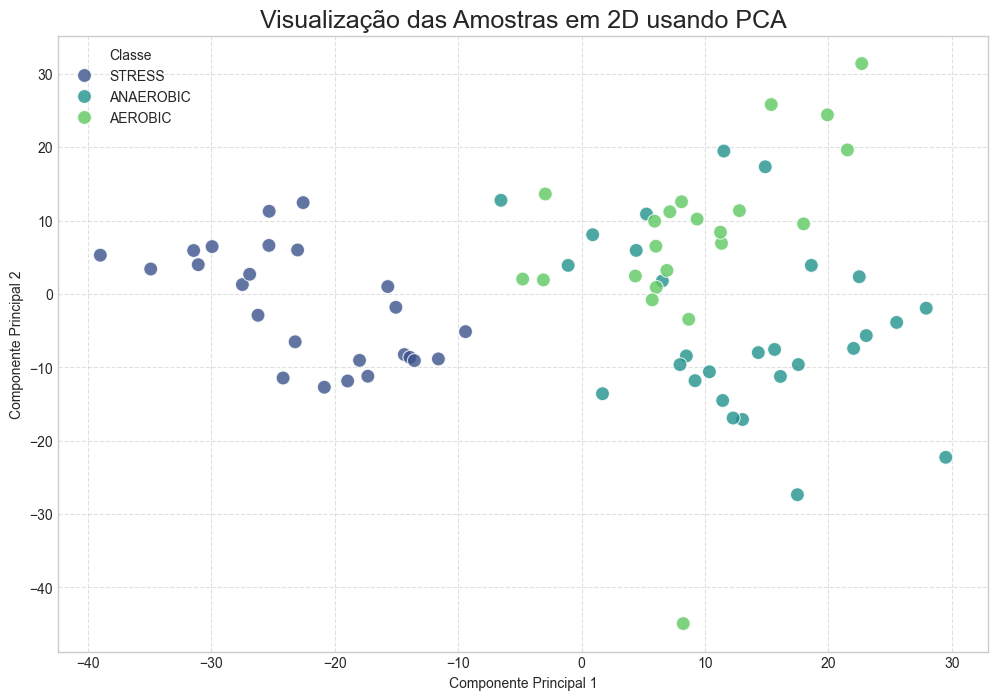

Variância explicada pelos 2 componentes principais: 38.08%


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Prepara os dados para o PCA ---
# 'X_features' já contém as características do tsfresh
# 'y_labels' já contém os rótulos de texto

# 1. Escalar os dados é OBRIGATÓRIO para o PCA funcionar corretamente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 2. Aplicar o PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Criar um DataFrame com os resultados para facilitar a plotagem
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Label'] = y_labels.values

# 4. Plotar o gráfico de dispersão do PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Label',
    data=df_pca,
    palette='viridis',
    s=100,  # Tamanho dos pontos
    alpha=0.8
)
plt.title('Visualização das Amostras em 2D usando PCA', fontsize=18)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Classe')
plt.show()

# Opcional: Ver quanto da informação os 2 componentes capturaram
print(f"Variância explicada pelos 2 componentes principais: {pca.explained_variance_ratio_.sum():.2%}")

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importa todos os classificadores necessários
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# --- 1. PREPARAÇÃO FINAL DOS DADOS (UMA VEZ PARA TODOS OS MODELOS) ---

# 'df_final_tsfresh' é o nosso DataFrame com as características
X = df_final_tsfresh

# Prepara os rótulos (y) alinhados com as características
y_labels = df_labels.set_index('Id').loc[X.index]['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# Escalar as características é crucial para a maioria destes modelos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dados prontos. Temos {X_scaled.shape[0]} amostras e {X_scaled.shape[1]} características.")
print("-" * 50)

# Dicionário para armazenar os resultados
model_scores = {}

# --- 2. TESTE E OTIMIZAÇÃO DE CADA MODELO ---

# --- Modelo 1: k-Nearest Neighbors (k-NN) ---
print("\nIniciando otimização para k-Nearest Neighbors (k-NN)...")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1: Distância de Manhattan, 2: Distância Euclidiana
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=1)
grid_knn.fit(X_scaled, y)
model_scores['k-NN'] = {'score': grid_knn.best_score_, 'params': grid_knn.best_params_}
print(f"k-NN Concluído. Melhor Acurácia: {grid_knn.best_score_:.2%}")
print(f"Melhores Parâmetros: {grid_knn.best_params_}")
print("-" * 50)

# --- Modelo 2: Gaussian Naïve Bayes ---
print("\nIniciando otimização para Gaussian Naïve Bayes...")
# Naive Bayes tem poucos parâmetros para otimizar, o principal é 'var_smoothing'
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=1)
grid_nb.fit(X_scaled, y)
model_scores['Naïve Bayes'] = {'score': grid_nb.best_score_, 'params': grid_nb.best_params_}
print(f"Naïve Bayes Concluído. Melhor Acurácia: {grid_nb.best_score_:.2%}")
print(f"Melhores Parâmetros: {grid_nb.best_params_}")
print("-" * 50)

# --- Modelo 3: Regressão Logística ---
print("\nIniciando otimização para Regressão Logística...")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # L2 é a penalidade padrão e mais comum
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=1)
grid_lr.fit(X_scaled, y)
model_scores['Logistic Regression'] = {'score': grid_lr.best_score_, 'params': grid_lr.best_params_}
print(f"Regressão Logística Concluída. Melhor Acurácia: {grid_lr.best_score_:.2%}")
print(f"Melhores Parâmetros: {grid_lr.best_params_}")
print("-" * 50)

# --- Modelo 4: Redes Neurais (Multi-layer Perceptron) ---
print("\nIniciando otimização para Redes Neurais (MLP)... (Pode ser mais demorado)")
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01], # Parâmetro de regularização
    'learning_rate_init': [0.001, 0.01]
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), param_grid_mlp, cv=5, scoring='accuracy', n_jobs=1)
grid_mlp.fit(X_scaled, y)
model_scores['Neural Network (MLP)'] = {'score': grid_mlp.best_score_, 'params': grid_mlp.best_params_}
print(f"Redes Neurais Concluída. Melhor Acurácia: {grid_mlp.best_score_:.2%}")
print(f"Melhores Parâmetros: {grid_mlp.best_params_}")
print("-" * 50)

# --- Modelo 5: Máquinas de Vetores de Suporte (SVM) ---
print("\nIniciando otimização para Support Vector Machine (SVM)...")
param_grid_svm = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 'scale']}
]
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=1)
grid_svm.fit(X_scaled, y)
model_scores['SVM'] = {'score': grid_svm.best_score_, 'params': grid_svm.best_params_}
print(f"SVM Concluído. Melhor Acurácia: {grid_svm.best_score_:.2%}")
print(f"Melhores Parâmetros: {grid_svm.best_params_}")
print("-" * 50)

# --- 3. SUMÁRIO FINAL E CONCLUSÃO ---

print("\n\n--- SUMÁRIO DE DESEMPENHO DOS MODELOS ---")
# Ordena os modelos pela acurácia, do melhor para o pior
sorted_models = sorted(model_scores.items(), key=lambda item: item[1]['score'], reverse=True)

for model_name, results in sorted_models:
    print(f"Modelo: {model_name}")
    print(f"  Melhor Acurácia (Validação Cruzada): {results['score']:.2%}")
    print(f"  Melhores Parâmetros: {results['params']}")
    print("-" * 30)

print("\nConclusão: O modelo com melhor desempenho na validação cruzada foi o '{}'.".format(sorted_models[0][0]))

Dados prontos. Temos 75 amostras e 1228 características.
--------------------------------------------------

Iniciando otimização para k-Nearest Neighbors (k-NN)...
k-NN Concluído. Melhor Acurácia: 86.67%
Melhores Parâmetros: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
--------------------------------------------------

Iniciando otimização para Gaussian Naïve Bayes...
Naïve Bayes Concluído. Melhor Acurácia: 85.33%
Melhores Parâmetros: {'var_smoothing': np.float64(1.0)}
--------------------------------------------------

Iniciando otimização para Regressão Logística...
Regressão Logística Concluída. Melhor Acurácia: 90.67%
Melhores Parâmetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
--------------------------------------------------

Iniciando otimização para Redes Neurais (MLP)... (Pode ser mais demorado)
Redes Neurais Concluída. Melhor Acurácia: 89.33%
Melhores Parâmetros: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
-------------------

/var/folders/g8/4vfzymxx0jj5hh4z1cc6td3w0000gn/T/ipykernel_1243/1847601462.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=model_names, y=model_accuracies, palette="viridis")


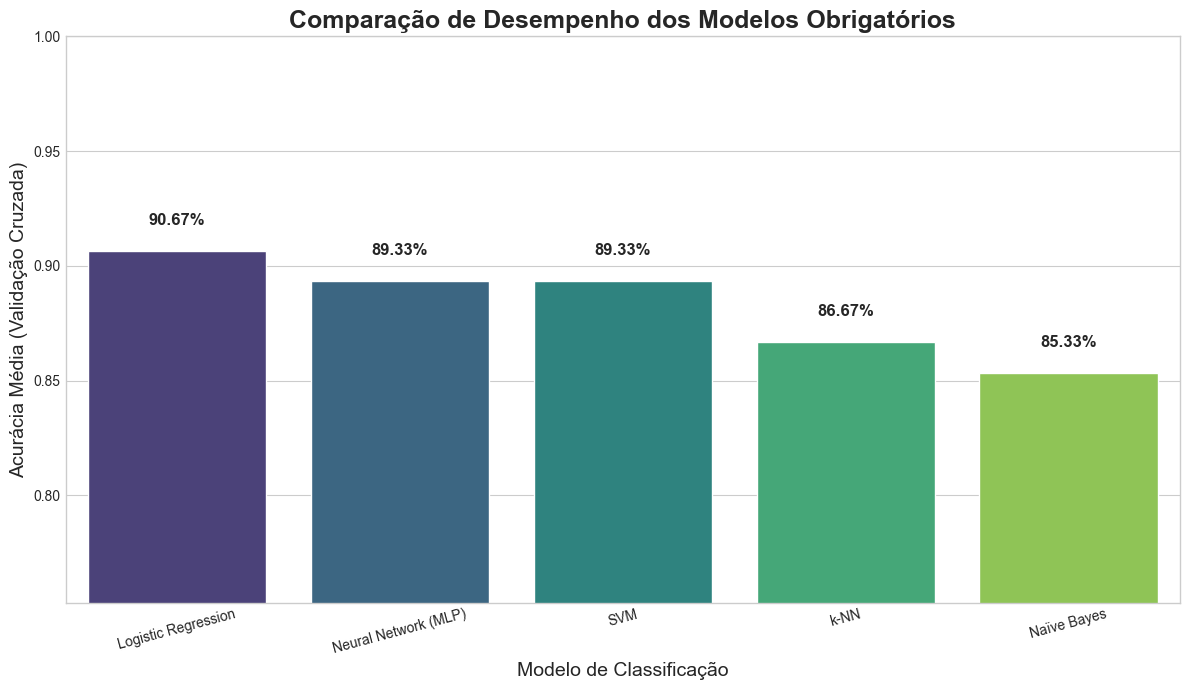



--- SUMÁRIO DE DESEMPENHO DOS MODELOS (TEXTO) ---
Modelo: Logistic Regression
  Melhor Acurácia (Validação Cruzada): 90.67%
  Melhores Parâmetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
------------------------------
Modelo: Neural Network (MLP)
  Melhor Acurácia (Validação Cruzada): 89.33%
  Melhores Parâmetros: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
------------------------------
Modelo: SVM
  Melhor Acurácia (Validação Cruzada): 89.33%
  Melhores Parâmetros: {'C': 0.1, 'kernel': 'linear'}
------------------------------
Modelo: k-NN
  Melhor Acurácia (Validação Cruzada): 86.67%
  Melhores Parâmetros: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
------------------------------
Modelo: Naïve Bayes
  Melhor Acurácia (Validação Cruzada): 85.33%
  Melhores Parâmetros: {'var_smoothing': np.float64(1.0)}
------------------------------

Conclusão: O gráfico confirma visualmente que o modelo com melhor desempenho na validação cruzada foi 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. PREPARAÇÃO DOS DADOS PARA O GRÁFICO ---
# Este passo assume que a célula anterior foi executada e o dicionário 'model_scores' existe.

# Ordena os modelos pela acurácia, do melhor para o pior, para um gráfico mais claro
sorted_models = sorted(model_scores.items(), key=lambda item: item[1]['score'], reverse=True)

# Extrai os nomes dos modelos e suas acurácias para listas separadas
model_names = [item[0] for item in sorted_models]
model_accuracies = [item[1]['score'] for item in sorted_models]

# --- 2. GERAÇÃO DO GRÁFICO DE BARRAS ---

plt.style.use('seaborn-v0_8-whitegrid') # Define um estilo visual agradável
plt.figure(figsize=(12, 7))

# Cria o gráfico de barras usando o Seaborn
barplot = sns.barplot(x=model_names, y=model_accuracies, palette="viridis")

# --- 3. MELHORIAS E ANOTAÇÕES NO GRÁFICO ---

# Adiciona os valores de acurácia exatos no topo de cada barra
for index, value in enumerate(model_accuracies):
    plt.text(index, value + 0.01, f'{value:.2%}', ha='center', va='bottom', fontsize=12, weight='bold')

# Define os títulos e rótulos dos eixos
plt.title('Comparação de Desempenho dos Modelos Obrigatórios', fontsize=18, weight='bold')
plt.xlabel('Modelo de Classificação', fontsize=14)
plt.ylabel('Acurácia Média (Validação Cruzada)', fontsize=14)

# Ajusta o limite do eixo Y para "dar zoom" na área de interesse e facilitar a visualização das diferenças
# Se os scores forem muito baixos, você pode ajustar o valor inicial (ex: de 0.5 para 0.4)
min_score = min(model_accuracies)
plt.ylim(max(0, min_score - 0.1), 1.0)

# Rotaciona os rótulos do eixo X se os nomes forem longos
plt.xticks(rotation=15)

# Mostra o gráfico final
plt.tight_layout()
plt.show()

# --- 4. IMPRIME O SUMÁRIO NOVAMENTE PARA REFERÊNCIA ---

print("\n\n--- SUMÁRIO DE DESEMPENHO DOS MODELOS (TEXTO) ---")
for model_name, results in sorted_models:
    print(f"Modelo: {model_name}")
    print(f"  Melhor Acurácia (Validação Cruzada): {results['score']:.2%}")
    print(f"  Melhores Parâmetros: {results['params']}")
    print("-" * 30)

print("\nConclusão: O gráfico confirma visualmente que o modelo com melhor desempenho na validação cruzada foi o '{}'.".format(sorted_models[0][0]))

In [62]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# Bibliotecas do tsfresh (assumindo que já estão carregadas, mas é bom garantir)
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters

# --- 1. IDENTIFICAR O MELHOR MODELO TREINADO ---

# Este passo assume que a célula anterior foi executada e o dicionário 'model_scores' existe.
# E que os objetos 'grid_knn', 'grid_nb', 'grid_lr', 'grid_mlp', 'grid_svm' também existem.

# Mapeia os nomes dos modelos para os objetos GridSearchCV treinados
trained_grids = {
    'k-NN': grid_knn,
    'Naïve Bayes': grid_nb,
    'Logistic Regression': grid_lr,
    'Neural Network (MLP)': grid_mlp,
    'SVM': grid_svm
}

# Encontra o nome do melhor modelo com base na pontuação
best_model_name = max(model_scores, key=lambda name: model_scores[name]['score'])

# Pega o objeto do melhor modelo já treinado
best_model = trained_grids[best_model_name].best_estimator_

print(f"O melhor modelo identificado foi o: '{best_model_name}' com acurácia de {model_scores[best_model_name]['score']:.2%}")
print("Este modelo será usado para fazer as previsões no conjunto de teste.")


# --- 2. CARREGAR E PROCESSAR O CONJUNTO DE TESTE ---

TEST_CSV_PATH = 'dataset/test.csv'
df_test = pd.read_csv(TEST_CSV_PATH)

# O processo de extração de características deve ser IDÊNTICO ao do treino
all_test_sensor_data = []
print("\nIniciando extração de características do CONJUNTO DE TESTE...")
for index, row in tqdm(df_test.iterrows(), total=len(df_test)):
    user_id = row['Id']
    # A lógica de leitura dos sensores é a mesma
    for sensor in ['HR', 'EDA', 'TEMP', 'BVP', 'ACC', 'IBI']:
        file_path = os.path.join(BASE_PATH, user_id, f'{sensor}.csv')
        try:
            if sensor == 'ACC':
                df_sensor = pd.read_csv(file_path, header=None, skiprows=1, names=['X', 'Y', 'Z'])
                for axis in ['X', 'Y', 'Z']:
                    df_axis = df_sensor[[axis]].copy(); df_axis.columns = ['value']; df_axis['kind'] = f'ACC_{axis}'; df_axis['Id'] = user_id; df_axis['time'] = range(len(df_axis)); all_test_sensor_data.append(df_axis[['Id', 'time', 'kind', 'value']])
            elif sensor == 'IBI':
                df_sensor = pd.read_csv(file_path, header=None, names=['Timestamp', 'Interval']); df_sensor['Interval'] = pd.to_numeric(df_sensor['Interval'], errors='coerce'); df_sensor.dropna(subset=['Interval'], inplace=True); df_sensor = df_sensor[['Interval']].copy(); df_sensor.columns = ['value']; df_sensor['kind'] = 'IBI'; df_sensor['Id'] = user_id; df_sensor['time'] = range(len(df_sensor)); all_test_sensor_data.append(df_sensor[['Id', 'time', 'kind', 'value']])
            else:
                df_sensor = pd.read_csv(file_path, header=None, skiprows=1, names=['value']); df_sensor['kind'] = sensor; df_sensor['Id'] = user_id; df_sensor['time'] = range(len(df_sensor)); all_test_sensor_data.append(df_sensor[['Id', 'time', 'kind', 'value']])
        except (FileNotFoundError, pd.errors.EmptyDataError):
            continue

df_test_long_format = pd.concat(all_test_sensor_data)

# Extrai as mesmas características eficientes
X_test_extracted = extract_features(df_test_long_format,
                                    column_id='Id',
                                    column_sort='time',
                                    column_kind='kind',
                                    column_value='value',
                                    default_fc_parameters=EfficientFCParameters(),
                                    n_jobs=6)

impute(X_test_extracted)

# --- 3. ALINHAR CARACTERÍSTICAS E FAZER PREDIÇÕES ---

# Garante que as colunas do conjunto de teste sejam as mesmas e na mesma ordem que as do treino
# 'X' aqui é o DataFrame de features de treino da célula anterior (df_final_tsfresh)
X_test_final = X_test_extracted.reindex(columns=X.columns, fill_value=0)

# Aplica o MESMO scaler que foi treinado nos dados de treino
X_test_scaled = scaler.transform(X_test_final)

print("\nCaracterísticas do conjunto de teste extraídas e escalonadas.")
print("Fazendo previsões de probabilidade...")

# Faz a predição de PROBABILIDADES
probabilities = best_model.predict_proba(X_test_scaled)


# --- 4. CRIAR O ARQUIVO DE SUBMISSÃO ---

# Cria um DataFrame para a submissão
submission_df = pd.DataFrame()
submission_df['Id'] = df_test['Id']

# Adiciona as colunas de probabilidade na ordem correta das classes
# O label_encoder foi treinado na célula anterior e sabe a ordem (0=AEROBIC, 1=ANAEROBIC, 2=STRESS, etc.)
for i, class_name in enumerate(label_encoder.classes_):
    submission_df[f'Predict_{i}'] = probabilities[:, i]

# Salva o arquivo no formato CSV
submission_df.to_csv('submission.csv', index=False)

print("\n---")
print("Arquivo 'submission.csv' criado com sucesso!")
print("Abaixo está uma prévia do arquivo de submissão:")
print(submission_df.head())
print("---")
print("\nEste arquivo está pronto para ser enviado ao Kaggle.")

O melhor modelo identificado foi o: 'Logistic Regression' com acurácia de 90.67%
Este modelo será usado para fazer as previsões no conjunto de teste.

Iniciando extração de características do CONJUNTO DE TESTE...


100%|██████████| 25/25 [00:00<00:00, 26.50it/s]
python(4862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Feature Extraction: 100%|██████████| 29/29 [31:47<00:00, 65.77s/it] 
/Users/andersongoncalves/Documents/SDUWPS/.venv/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EDA__query_similarity_count__query_None__threshold_0.0'
 'HR__query_similarity_count__query_None__threshold_0.0'
 'IBI__friedrich_coefficients__coeff


Características do conjunto de teste extraídas e escalonadas.
Fazendo previsões de probabilidade...

---
Arquivo 'submission.csv' criado com sucesso!
Abaixo está uma prévia do arquivo de submissão:
        Id  Predict_0  Predict_1  Predict_2
0  U_19341   0.166501   0.052866   0.780633
1  U_54670   0.266946   0.001465   0.731589
2  U_21920   0.227936   0.029553   0.742511
3  U_58128   0.661348   0.231864   0.106789
4  U_73365   0.894169   0.097745   0.008086
---

Este arquivo está pronto para ser enviado ao Kaggle.


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.